In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from idskicker.config import data_dir
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (10,8)
sns.set_style("darkgrid")

df = pd.read_csv(data_dir / 'processed' / '02-ks-projects-engineered.csv')

## Choosing the right category

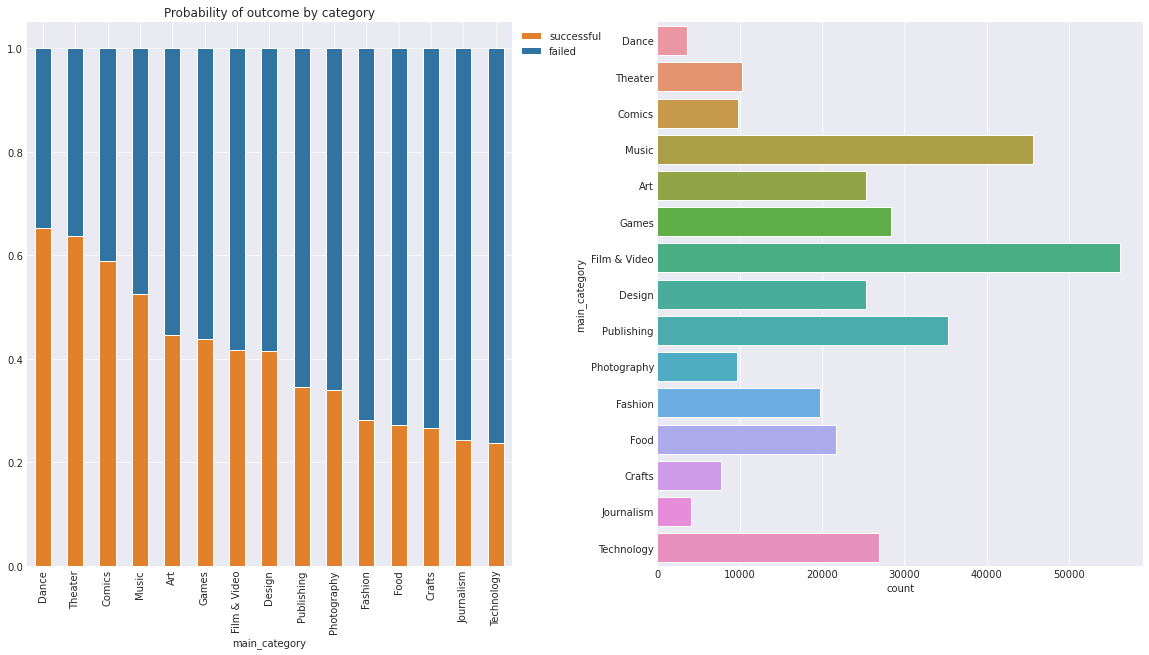

In [2]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10 ))
fig.subplots_adjust(wspace=0.3)

ct = pd.crosstab(df["main_category"], df["state"], normalize="index")
ct = ct[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[0])
ax[0].legend(bbox_to_anchor=(1, 1))
ax[0].set_title("Probability of outcome by category")

success_order = ct.index.values

sns.countplot(y="main_category", data=df, orient="h", ax=ax[1], order=success_order)

chosen_category = "Theater"
chosen_df = df.loc[(df["main_category"] == chosen_category)]

## Choosing the right goal amount for your project

Text(0.5, 0, '')

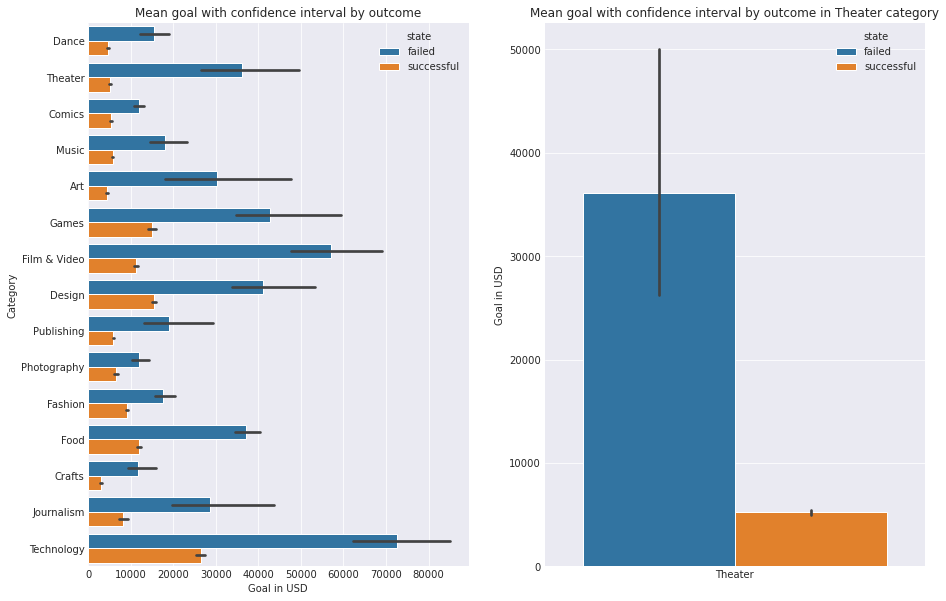

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 10 ))
sns.barplot(ax = ax[0], y="main_category", x="usd_goal_real", hue="state", 
            data=df, orient="h", order=success_order)
ax[0].set_title("Mean goal with confidence interval by outcome")
ax[0].set_xlabel("Goal in USD")
ax[0].set_ylabel("Category")

sns.barplot(ax = ax[1], y="usd_goal_real", x="main_category", hue="state", data=chosen_df)
ax[1].set_title("Mean goal with confidence interval by outcome in " + chosen_category + " category")
ax[1].set_ylabel("Goal in USD")
ax[1].set_xlabel("")

## Choosing the right title for your project

Text(0.5, 1.0, 'Project name correlation in Theater category')

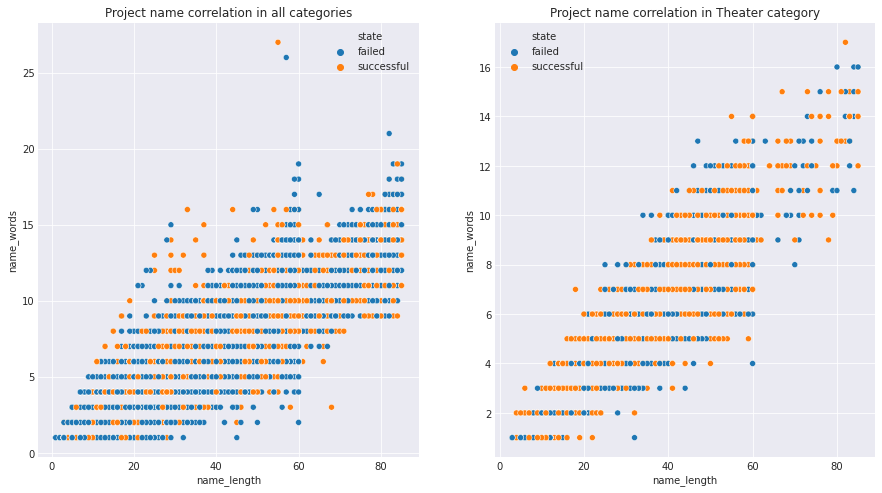

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))
sns.scatterplot(ax=ax[0], data=df, x="name_length", y="name_words", hue="state")
ax[0].set_title("Project name correlation in all categories")

sns.scatterplot(ax=ax[1], data=chosen_df, x="name_length", y="name_words", hue="state")
ax[1].set_title("Project name correlation in " + chosen_category + " category")

## Choosing the right month and day to start campaign

Text(0.5, 1.0, 'Probability of outcome by day in Theater category')

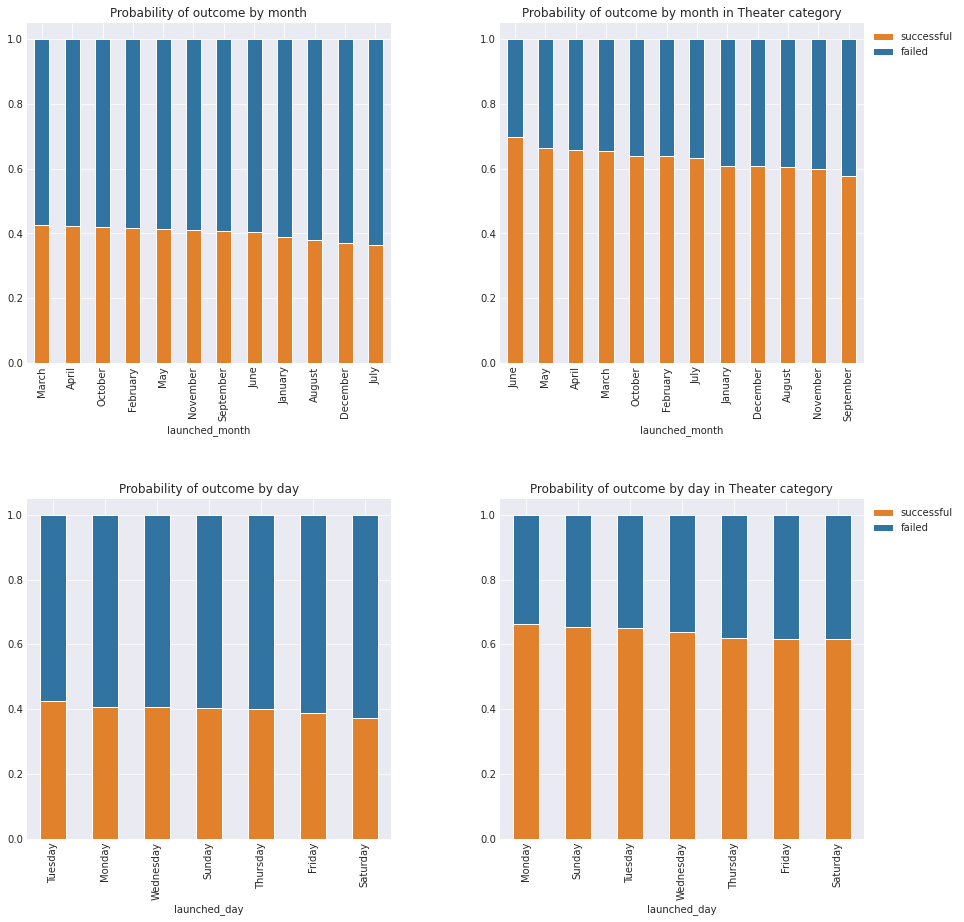

In [5]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ct1 = pd.crosstab(df["launched_month"], df["state"], normalize="index")
ct1 = ct1[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct1.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[0][0])
ax[0][0].legend().remove()
ax[0][0].set_title("Probability of outcome by month")

ct2 = pd.crosstab(chosen_df["launched_month"], chosen_df["state"], normalize="index")
ct2 = ct2[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct2.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[0][1])
ax[0][1].legend(bbox_to_anchor=(1, 1))
ax[0][1].set_title("Probability of outcome by month in " + chosen_category + " category")

ct3 = pd.crosstab(df["launched_day"], df["state"], normalize="index")
ct3 = ct3[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct3.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[1][0])
ax[1][0].legend().remove()
ax[1][0].set_title("Probability of outcome by day")

ct4 = pd.crosstab(chosen_df["launched_day"], chosen_df["state"], normalize="index")
ct4 = ct4[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct4.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[1][1])
ax[1][1].legend(bbox_to_anchor=(1, 1))
ax[1][1].set_title("Probability of outcome by day in " + chosen_category + " category")

Text(0.5, 1.0, 'Probaility of success on each weekday of the month in Theater category')

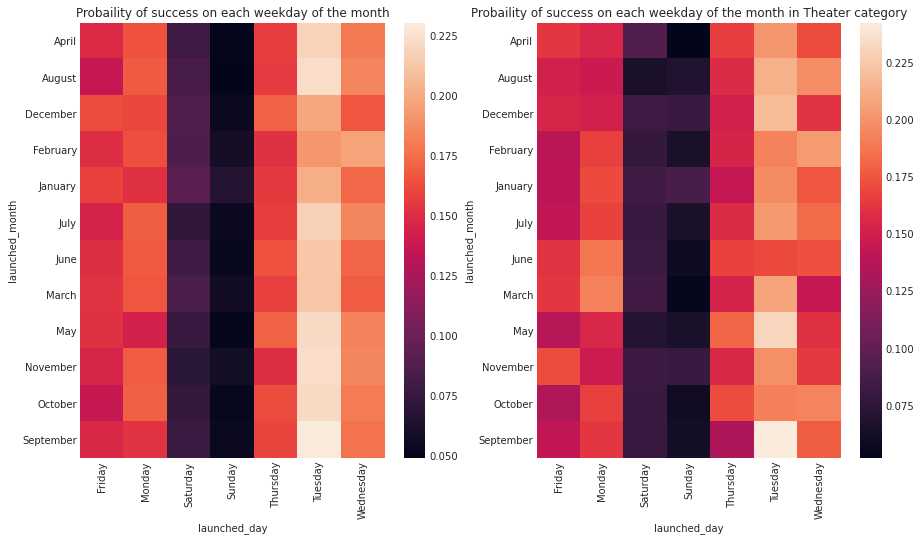

In [6]:
def calc_success_proba(series):
    val_counts = series.value_counts()
    if "successful" not in val_counts:
        return 0
    return val_counts["successful"] / len(series)
    
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))

success_df = df.loc[df["state"] == "successful"]
ct1 = pd.crosstab(success_df["launched_month"], success_df["launched_day"], normalize="index")
sns.heatmap(ct1, ax=ax[0])
ax[0].set_title("Probaility of success on each weekday of the month")

success_chosen_df = chosen_df.loc[chosen_df["state"] == "successful"]
ct2 = pd.crosstab(success_chosen_df["launched_month"], success_chosen_df["launched_day"], normalize="index")
sns.heatmap(ct2, ax=ax[1])
ax[1].set_title("Probaility of success on each weekday of the month in " + chosen_category + " category")

## Choosing the right time to launch your project

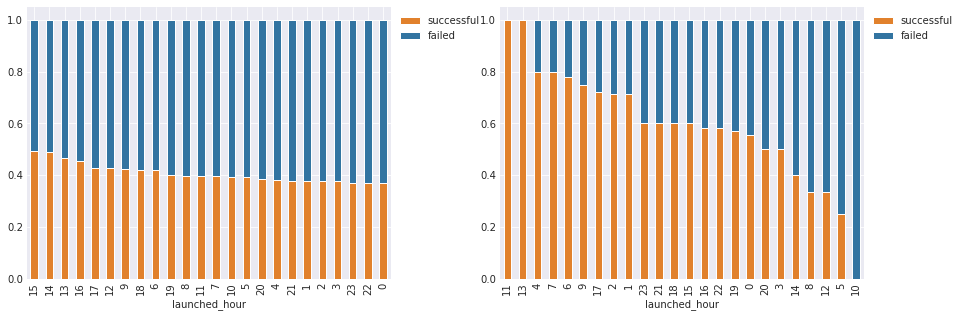

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5 ))
fig.subplots_adjust(wspace=0.3)

df_selected_date = df.loc[(df["main_category"] == chosen_category) 
       & (df["launched_month"] == "September") 
       & (df["launched_day"] == "Tuesday")]

ct = pd.crosstab(df["launched_hour"], df["state"], normalize="index")
ct = ct[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[0])
ax[0].legend(bbox_to_anchor=(1, 1))

ct2 = pd.crosstab(df_selected_date["launched_hour"], df_selected_date["state"], normalize="index")
ct2 = ct2[["successful", "failed"]].sort_values(by="successful", ascending=False)
ct2.plot.bar(stacked=True, color=["#e1812c", "#3274a1"], ax=ax[1])
ax[1].legend(bbox_to_anchor=(1, 1))

## Choosing the right project length

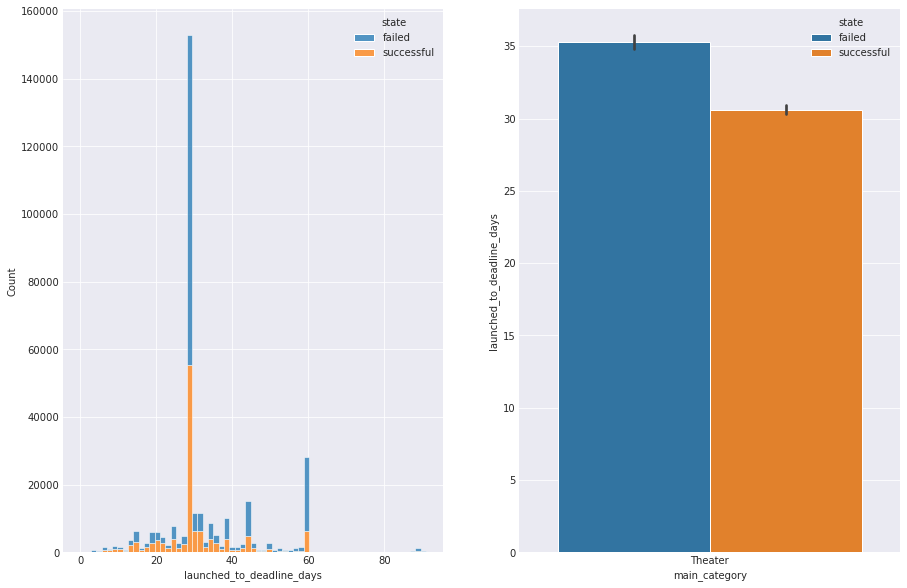

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 10 ))
success_df = df.loc[df["state"] == "successful"]
sns.histplot(ax = ax[0], x="launched_to_deadline_days", hue="state", data=df, bins=65, multiple="stack")

sns.barplot(ax = ax[1], y="launched_to_deadline_days", x="main_category", hue="state", data=chosen_df)

Text(0, 0.5, 'Category')

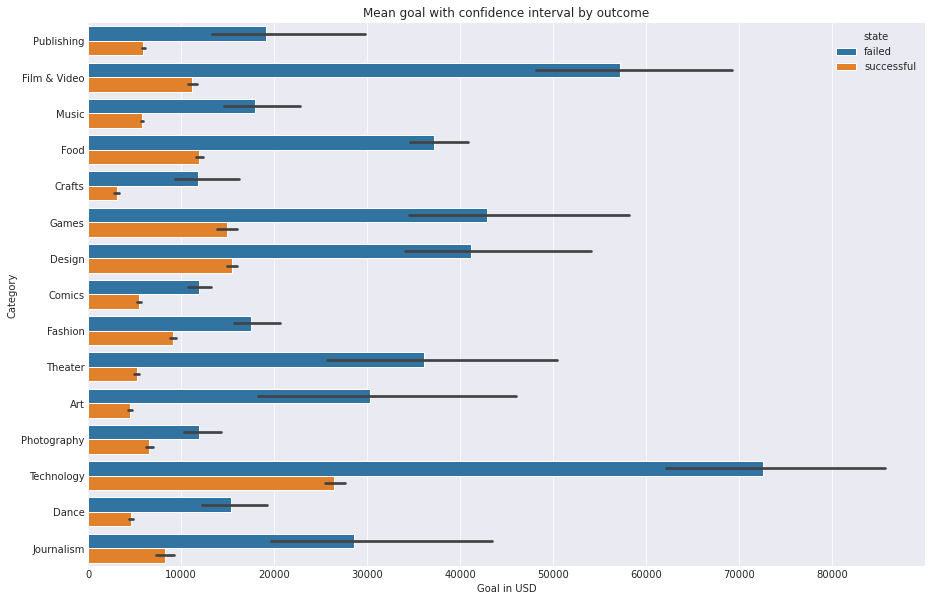

In [9]:
fig, ax = plt.subplots(figsize=(15, 10 ))
sns.barplot(ax = ax, y="main_category", x="usd_goal_real", hue="state", 
            data=df, orient="h")
ax.set_title("Mean goal with confidence interval by outcome")
ax.set_xlabel("Goal in USD")
ax.set_ylabel("Category")
